In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import KNNImputer
import numpy as np
import matplotlib.pyplot as plt

In [2]:
sales = pd.read_excel('sales.xlsx')
sales

,CustomerID,Date_Adherence,Recency,MntMeat&Fish,MntEntries,MntVegan&Vegetarian,MntDrinks,MntDesserts,MntAdditionalRequests,NumOfferPurchases,NumAppPurchases,NumTakeAwayPurchases,NumStorePurchases,NumAppVisitsMonth,Complain
0,11054,2021-03-18 00:00:00,85.0,7230.0,1820,3435.0,1600.0,440.0,57.0,1,13,4,13,6,0
1,17117,2021-03-01 00:00:00,96.0,5850.0,320,2745.0,500.0,320.0,8.0,3,9,7,9,6,0
2,31751,2021-11-01 00:00:00,7.0,8380.0,0,1560.0,0.0,0.0,28.0,3,9,5,3,9,0
3,12947,2022-05-19 00:00:00,54.0,5090.0,280,2355.0,140.0,560.0,78.0,3,7,5,11,3,0
4,11402,2021-01-01 00:00:00,64.0,330.0,0,240.0,0.0,0.0,7.0,2,4,1,3,8,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7003,23699,2021-11-27 00:00:00,54.0,290.0,20,180.0,0.0,40.0,4.0,2,4,1,4,7,0
7004,23255,2021-03-25 00:00:00,27.0,230.0,80,525.0,20.0,80.0,23.0,3,5,1,3,8,0
7005,5798,2022-04-12 00:00:00,36.0,3050.0,2460,3840.0,1800.0,980.0,107.0,1,8,4,13,4,0
7006,16577,2020-09-01 00:00:00,49.0,20.0,200,90.0,160.0,0.0,14.0,1,3,2,2,8,1


In [3]:
sales.set_index ('CustomerID', inplace = True)

In [4]:
#check for duplicates 
#sales [sales.duplicated()]
sales.drop_duplicates(inplace= True)

In [5]:
sales.shape

(7000, 14)

INFO : 6 float variables;
8 integer variables;
1 object variable

In [6]:
#Impute MntDrinks

sales_products = sales[['MntDrinks','MntDesserts','MntEntries','MntVegan&Vegetarian']] # we are using this variables to impute in drinks because they have a corr>0.7

imputer = KNNImputer(n_neighbors=1)
array_impute = imputer.fit_transform(sales_products) # this is an array
sales_products = pd.DataFrame(array_impute, columns = sales_products.columns)

sales['MntDrinks'] = sales_products['MntDrinks'].values

In [7]:
#Input recency com a média
sales.fillna({'Recency': sales['Recency'].mean}, inplace = True)

In [8]:
#sales.isna().sum()

In [9]:
sales

,Date_Adherence,Recency,MntMeat&Fish,MntEntries,MntVegan&Vegetarian,MntDrinks,MntDesserts,MntAdditionalRequests,NumOfferPurchases,NumAppPurchases,NumTakeAwayPurchases,NumStorePurchases,NumAppVisitsMonth,Complain
CustomerID,,,,,,,,,,,,,,
11054,2021-03-18 00:00:00,85.0,7230.0,1820,3435.0,1600.0,440.0,57.0,1,13,4,13,6,0
17117,2021-03-01 00:00:00,96.0,5850.0,320,2745.0,500.0,320.0,8.0,3,9,7,9,6,0
31751,2021-11-01 00:00:00,7.0,8380.0,0,1560.0,0.0,0.0,28.0,3,9,5,3,9,0
12947,2022-05-19 00:00:00,54.0,5090.0,280,2355.0,140.0,560.0,78.0,3,7,5,11,3,0
11402,2021-01-01 00:00:00,64.0,330.0,0,240.0,0.0,0.0,7.0,2,4,1,3,8,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23699,2021-11-27 00:00:00,54.0,290.0,20,180.0,0.0,40.0,4.0,2,4,1,4,7,0
23255,2021-03-25 00:00:00,27.0,230.0,80,525.0,20.0,80.0,23.0,3,5,1,3,8,0
5798,2022-04-12 00:00:00,36.0,3050.0,2460,3840.0,1800.0,980.0,107.0,1,8,4,13,4,0


In [10]:
df_mnt_pre_normalize=sales[['MntMeat&Fish','MntEntries','MntVegan&Vegetarian','MntDrinks','MntDesserts','MntAdditionalRequests']].copy()

In [11]:
df_mnt_pre_normalize

,MntMeat&Fish,MntEntries,MntVegan&Vegetarian,MntDrinks,MntDesserts,MntAdditionalRequests
CustomerID,,,,,,
11054,7230.0,1820,3435.0,1600.0,440.0,57.0
17117,5850.0,320,2745.0,500.0,320.0,8.0
31751,8380.0,0,1560.0,0.0,0.0,28.0
12947,5090.0,280,2355.0,140.0,560.0,78.0
11402,330.0,0,240.0,0.0,0.0,7.0
...,...,...,...,...,...,...
23699,290.0,20,180.0,0.0,40.0,4.0
23255,230.0,80,525.0,20.0,80.0,23.0
5798,3050.0,2460,3840.0,1800.0,980.0,107.0


In [12]:
# ZSCORE NORMALIZATION
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Initialize scaler object
scaler = StandardScaler()

# Apply scaler to the data in the data frame
df_mnt = pd.DataFrame(scaler.fit_transform(df_mnt_pre_normalize), columns=df_mnt_pre_normalize.columns)

# View the normalized data frame
print(df_mnt.head())

   MntMeat&Fish  MntEntries  MntVegan&Vegetarian  MntDrinks  MntDesserts  \
0      1.231545    1.631463             0.166294   1.306613    -0.125481   
1      0.822066   -0.272597            -0.010247  -0.057739    -0.275076   
2      1.572778   -0.678797            -0.313437  -0.677900    -0.673996   
3      0.596556   -0.323372            -0.110031  -0.504255     0.024115   
4     -0.815849   -0.678797            -0.651168  -0.677900    -0.673996   

   MntAdditionalRequests  
0               0.290929  
1              -0.696035  
2              -0.293192  
3               0.713914  
4              -0.716177  


In [13]:
from sklearn.cluster import KMeans

In [14]:
# DO IT
ks = range(1, 11)
inertias = []

for k in ks:
    model = KMeans(n_clusters=k).fit(df_mnt)
    inertias.append(model.inertia_)

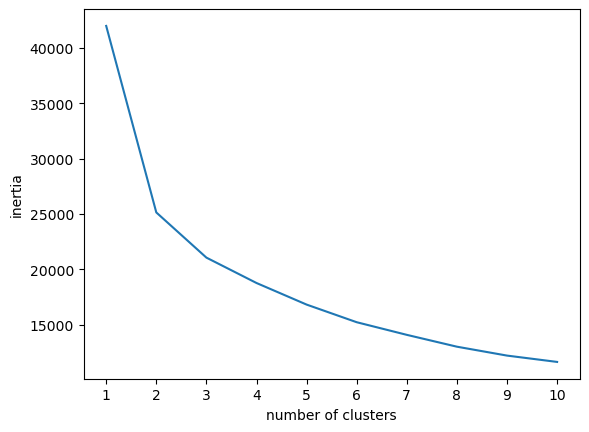

In [15]:
# Plot ks (x-axis) vs inertias (y-axis) using plt.plot(). 
plt.plot(ks, inertias)

# define the label for the x axis as 'number of clusters' using matplotlib.pyplot.xlabel
plt.xlabel('number of clusters')
# define the label for the y axis as 'inertia' using matplotlib.pyplot.ylabel
plt.ylabel('inertia')
# define the ticks on the x axis using the values of ks
plt.xticks(ks)
# call plt.show()
plt.show()

In [16]:
df_mnt.corr()

,MntMeat&Fish,MntEntries,MntVegan&Vegetarian,MntDrinks,MntDesserts,MntAdditionalRequests
MntMeat&Fish,1.000000,0.391166,0.475275,0.389256,0.405025,0.383335
MntEntries,0.391166,1.000000,0.458884,0.558761,0.566151,0.371052
MntVegan&Vegetarian,0.475275,0.458884,1.000000,0.459858,0.457396,0.289569
MntDrinks,0.389256,0.558761,0.459858,1.000000,0.550678,0.380607
MntDesserts,0.405025,0.566151,0.457396,0.550678,1.000000,0.374886
MntAdditionalRequests,0.383335,0.371052,0.289569,0.380607,0.374886,1.000000


In [17]:
df_mnt_k3 = df_mnt.copy()
model_k3 = KMeans(n_clusters=3, random_state = 100).fit(df_mnt)

In [18]:
model_k3

KMeans(n_clusters=3, random_state=100)

In [19]:
# DO IT
df_mnt_k3['k3 cluster'] = model_k3.labels_

In [20]:
#DO IT
df_mnt_k3.groupby(['k3 cluster']).mean().transpose()

k3 cluster,0,1,2
MntMeat&Fish,-0.647906,0.741909,0.839995
MntEntries,-0.518355,1.513385,0.042996
MntVegan&Vegetarian,-0.577064,1.037135,0.490779
MntDrinks,-0.522447,1.513957,0.051114
MntDesserts,-0.513786,1.525012,0.025542
MntAdditionalRequests,-0.505744,0.806960,0.499873


In [21]:
#DO IT
descr3 = df_mnt_k3.groupby(['k3 cluster']).describe().transpose()
descr3

k3 cluster                             0            1            2
MntMeat&Fish          count  3868.000000  1272.000000  1860.000000
                      mean     -0.647906     0.741909     0.839995
                      std       0.365477     0.897172     0.990585
                      min      -0.913768    -0.884096    -0.912878
                      25%      -0.884096     0.075806     0.065421
                      50%      -0.818817     0.602491     0.780525
                      75%      -0.542122     1.311661     1.504531
                      max       1.252316     3.516319     3.531156
MntEntries            count  3868.000000  1272.000000  1860.000000
                      mean     -0.518355     1.513385     0.042996
                      std       0.246266     1.283913     0.619859
                      min      -0.678797    -0.678797    -0.678797
                      25%      -0.653409     0.412864    -0.424922
                      50%      -0.602634     1.402975    -0.094885
                      75%      -0.475697     2.418474     0.387477
                      max       2.266149     4.373309     2.824673
MntVegan&Vegetarian   count  3868.000000  1272.000000  1860.000000
                      mean     -0.577064     1.037135     0.490779
                      std       0.158434     0.916681     1.211967
                      min      -0.712574    -0.543708    -0.681871
                      25%      -0.678033     0.266078    -0.240518
                      50%      -0.639655     0.958810     0.104888
                      75%      -0.532195     1.702393     0.758282
                      max       0.784188     3.121438     5.933046
MntDrinks             count  3868.000000  1272.000000  1860.000000
                      mean     -0.522447     1.513957     0.051114
                      std       0.235170     1.256073     0.657932
                      min      -0.677900    -0.677900    -0.677900
                      25%      -0.653093     0.463195    -0.454642
                      50%      -0.603480     1.405839    -0.107352
                      75%      -0.479448     2.453909     0.388776
                      max       2.174837     4.258575     2.869417
MntDesserts           count  3868.000000  1272.000000  1860.000000
                      mean     -0.513786     1.525012     0.025542
                      std       0.249179     1.267170     0.630287
                      min      -0.673996    -0.673996    -0.673996
                      25%      -0.649064     0.442981    -0.449604
                      50%      -0.599199     1.470202    -0.125481
                      75%      -0.474536     2.517369     0.373170
                      max       2.143381     4.287579     3.016020
MntAdditionalRequests count  3868.000000  1272.000000  1860.000000
                      mean     -0.505744     0.806960     0.499873
                      std       0.376086     1.202201     1.120418
                      min      -0.857172    -0.857172    -0.857172
                      25%      -0.770561    -0.152198    -0.338512
                      50%      -0.635609     0.472208     0.149934
                      75%      -0.373761     1.580025     1.096614
                      max       1.660593     4.158217     4.158217

In [22]:
df_mnt_k2 = df_mnt.copy()
model_k2 = KMeans(n_clusters=2, random_state = 100).fit(df_mnt)

In [23]:
# DO IT
df_mnt_k2['k2'] = model_k2.labels_

In [24]:
#DO IT
df_mnt_k2.groupby(['k2']).mean().transpose()

k2,0,1
MntMeat&Fish,-0.437105,0.851748
MntEntries,-0.468869,0.913643
MntVegan&Vegetarian,-0.501485,0.977198
MntDrinks,-0.471402,0.918579
MntDesserts,-0.468620,0.913158
MntAdditionalRequests,-0.362398,0.706173


In [25]:
#DO IT
descr2 = df_mnt_k2.groupby(['k2']).describe().transpose()
descr2

k2                                     0            1
MntMeat&Fish          count  4626.000000  2374.000000
                      mean     -0.437105     0.851748
                      std       0.664307     0.995745
                      min      -0.913768    -0.912878
                      25%      -0.875194     0.095093
                      50%      -0.762439     0.740467
                      75%      -0.243914     1.549040
                      max       3.531156     3.528188
MntEntries            count  4626.000000  2374.000000
                      mean     -0.468869     0.913643
                      std       0.313558     1.222527
                      min      -0.678797    -0.678797
                      25%      -0.653409    -0.044110
                      50%      -0.577247     0.590577
                      75%      -0.424922     1.631463
                      max       2.316924     4.373309
MntVegan&Vegetarian   count  4626.000000  2374.000000
                      mean     -0.501485     0.977198
                      std       0.270504     1.166903
                      min      -0.712574    -0.666519
                      25%      -0.672852     0.131753
                      50%      -0.612790     0.736214
                      75%      -0.428573     1.563271
                      max       1.862623     5.933046
MntDrinks             count  4626.000000  2374.000000
                      mean     -0.471402     0.918579
                      std       0.312942     1.217225
                      min      -0.677900    -0.677900
                      25%      -0.653093    -0.057739
                      50%      -0.578674     0.636840
                      75%      -0.429836     1.629096
                      max       2.249256     4.258575
MntDesserts           count  4626.000000  2374.000000
                      mean     -0.468620     0.913158
                      std       0.301580     1.228933
                      min      -0.673996    -0.673996
                      25%      -0.649064    -0.075615
                      50%      -0.574266     0.597563
                      75%      -0.424671     1.719527
                      max       2.143381     4.287579
MntAdditionalRequests count  4626.000000  2374.000000
                      mean     -0.362398     0.706173
                      std       0.601874     1.220206
                      min      -0.857172    -0.857172
                      25%      -0.750419    -0.252908
                      50%      -0.575182     0.311071
                      75%      -0.212624     1.459172
                      max       4.097790     4.158217

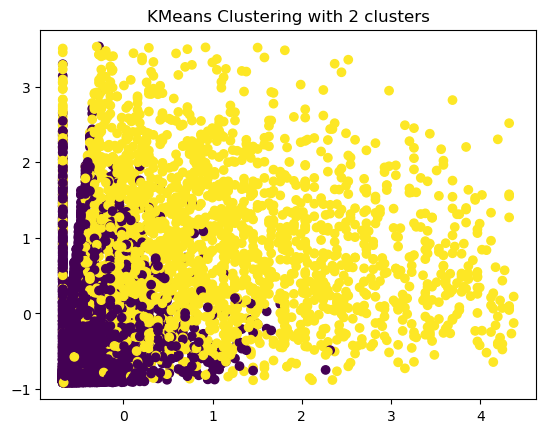

In [27]:
import matplotlib.pyplot as plt

plt.scatter(df_mnt_k2['MntEntries'], df_mnt_k2['MntMeat&Fish'], c=df_mnt_k2['k2'])
plt.xlabel('')
plt.ylabel('')
plt.title('KMeans Clustering with 2 clusters')
plt.show()

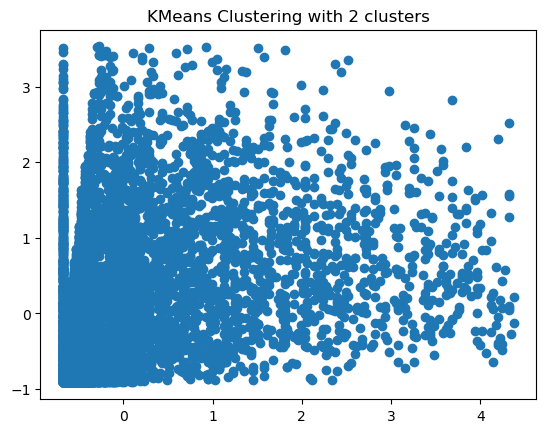

In [28]:
import matplotlib.pyplot as plt

plt.scatter(df_mnt['MntEntries'], df_mnt['MntMeat&Fish'])
plt.xlabel('')
plt.ylabel('')
plt.title('KMeans Clustering with 2 clusters')
plt.show()

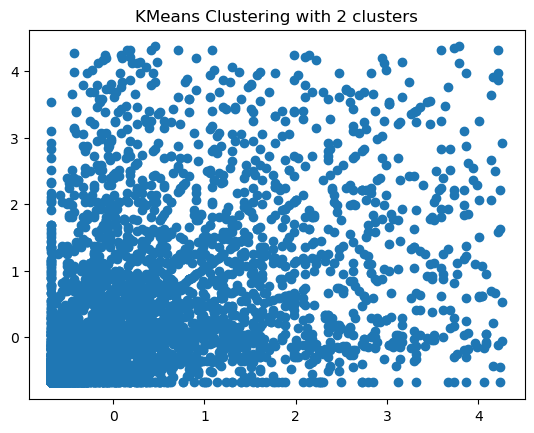

In [29]:
import matplotlib.pyplot as plt

plt.scatter(df_mnt_k2['MntDrinks'], df_mnt_k2['MntEntries'])
plt.xlabel('')
plt.ylabel('')
plt.title('KMeans Clustering with 2 clusters')
plt.show()

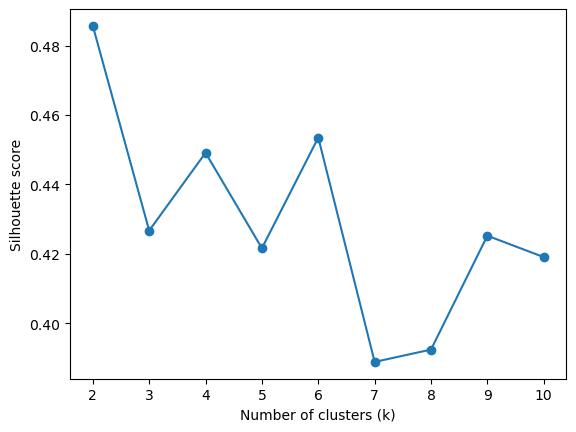

In [30]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Create a list to store silhouette scores for different values of k
silhouette_scores = []

# Fit k-means clustering for different values of k
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(df_mnt)
    score = silhouette_score(df_mnt, labels)
    silhouette_scores.append(score)

# Plot the silhouette scores for different values of k
import matplotlib.pyplot as plt
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette score')
plt.show()


In [31]:
df_mnt_k4 = df_mnt.copy()
model_k4 = KMeans(n_clusters=4, random_state = 100).fit(df_mnt)

In [32]:
# DO IT
df_mnt_k4['k4'] = model_k4.labels_

In [33]:
#DO IT
df_mnt_k4.groupby(['k4']).mean().transpose()

k4,0,1,2,3
MntMeat&Fish,0.479571,1.036291,0.739679,-0.624131
MntEntries,0.205532,0.179464,1.744400,-0.512794
MntVegan&Vegetarian,0.195028,0.811360,1.069212,-0.571056
MntDrinks,0.300542,0.200153,1.654669,-0.516386
MntDesserts,0.191829,0.151465,1.781672,-0.509325
MntAdditionalRequests,2.063381,-0.127888,0.647326,-0.490833


In [34]:
descr4 = df_mnt_k4.groupby(['k4']).describe().transpose()
descr4

k4                                    0            1           2            3
MntMeat&Fish          count  733.000000  1376.000000  935.000000  3956.000000
                      mean     0.479571     1.036291    0.739679    -0.624131
                      std      0.913001     0.995434    0.862849     0.400107
                      min     -0.890030    -0.912878   -0.854424    -0.913768
                      25%     -0.210533     0.299091    0.098060    -0.881129
                      50%      0.284996     1.038675    0.623261    -0.812882
                      75%      1.006035     1.715947    1.284956    -0.495388
                      max      3.519287     3.531156    3.480713     1.516400
MntEntries            count  733.000000  1376.000000  935.000000  3956.000000
                      mean     0.205532     0.179464    1.744400    -0.512794
                      std      0.790048     0.733821    1.301065     0.256863
                      min     -0.678797    -0.678797   -0.678797    -0.678797
                      25%     -0.374147    -0.374147    0.666739    -0.653409
                      50%     -0.008568     0.010473    1.682238    -0.602634
                      75%      0.572805     0.565189    2.723124    -0.475697
                      max      4.195596     3.383198    4.373309     2.266149
MntVegan&Vegetarian   count  733.000000  1376.000000  935.000000  3956.000000
                      mean     0.195028     0.811360    1.069212    -0.571056
                      std      0.727310     1.321908    0.931826     0.164005
                      min     -0.666519    -0.635817   -0.489978    -0.712574
                      25%     -0.313437    -0.037112    0.304456    -0.678033
                      50%     -0.060139     0.415754    1.002945    -0.635817
                      75%      0.473322     1.242811    1.743650    -0.524519
                      max      2.987113     5.933046    3.121438     0.784188
MntDrinks             count  733.000000  1376.000000  935.000000  3956.000000
                      mean     0.300542     0.200153    1.654669    -0.516386
                      std      0.933794     0.784546    1.283805     0.246249
                      min     -0.677900    -0.677900   -0.677900    -0.677900
                      25%     -0.405029    -0.380223    0.562421    -0.653093
                      50%      0.016680     0.016680    1.604290    -0.603480
                      75%      0.736066     0.587227    2.621353    -0.479448
                      max      3.985705     4.060124    4.258575     2.174837
MntDesserts           count  733.000000  1376.000000  935.000000  3956.000000
                      mean     0.191829     0.151465    1.781672    -0.509325
                      std      0.820423     0.715384    1.265057     0.254449
                      min     -0.673996    -0.673996   -0.673996    -0.673996
                      25%     -0.424671    -0.374806    0.722226    -0.649064
                      50%     -0.075615    -0.025750    1.819258    -0.599199
                      75%      0.522766     0.547698    2.816559    -0.474536
                      max      4.013321     3.315210    4.287579     2.143381
MntAdditionalRequests count  733.000000  1376.000000  935.000000  3956.000000
                      mean     2.063381    -0.127888    0.647326    -0.490833
                      std      0.911590     0.479283    1.035249     0.385157
                      min      0.371498    -0.857172   -0.857172    -0.857172
                      25%      1.298035    -0.514756   -0.152198    -0.756461
                      50%      1.922441    -0.192482    0.371498    -0.635609
                      75%      2.687842     0.210361    1.277893    -0.353619
                      max      4.158217     1.479314    4.158217     1.338319

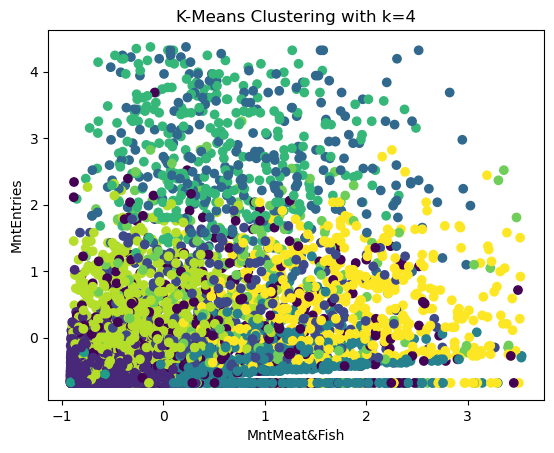

In [35]:
import matplotlib.pyplot as plt

# Select two variables to plot
x_var = 'MntMeat&Fish'
y_var = 'MntEntries'

# Create scatter plot with color-coded clusters
plt.scatter(df_mnt[x_var], df_mnt[y_var], c=kmeans.labels_)
plt.xlabel(x_var)
plt.ylabel(y_var)
plt.title('K-Means Clustering with k=4')
plt.show()


In [36]:
df_mnt.corr()

,MntMeat&Fish,MntEntries,MntVegan&Vegetarian,MntDrinks,MntDesserts,MntAdditionalRequests
MntMeat&Fish,1.000000,0.391166,0.475275,0.389256,0.405025,0.383335
MntEntries,0.391166,1.000000,0.458884,0.558761,0.566151,0.371052
MntVegan&Vegetarian,0.475275,0.458884,1.000000,0.459858,0.457396,0.289569
MntDrinks,0.389256,0.558761,0.459858,1.000000,0.550678,0.380607
MntDesserts,0.405025,0.566151,0.457396,0.550678,1.000000,0.374886
MntAdditionalRequests,0.383335,0.371052,0.289569,0.380607,0.374886,1.000000


In [37]:
#Let's try interpret MntEntries, MntDrinks and MntDesserts as compliments

In [38]:
from sklearn.preprocessing import MinMaxScaler

# Create a MinMaxScaler object
scaler = MinMaxScaler()

# Apply MinMaxScaler to your dataframe
df_mnt_scaled = scaler.fit_transform(df_mnt)

# The df_mnt_scaled is now a numpy array with the same shape as your original dataframe

import pandas as pd

# Transform numpy array into dataframe
df_mnt_scaled = pd.DataFrame(df_mnt_scaled, columns=df_mnt.columns)


In [39]:
df_mnt_scaled

,MntMeat&Fish,MntEntries,MntVegan&Vegetarian,MntDrinks,MntDesserts,MntAdditionalRequests
0,0.482644,0.457286,0.132248,0.402010,0.110553,0.228916
1,0.390521,0.080402,0.105683,0.125628,0.080402,0.032129
2,0.559413,0.000000,0.060060,0.000000,0.000000,0.112450
3,0.339786,0.070352,0.090668,0.035176,0.140704,0.313253
4,0.022029,0.000000,0.009240,0.000000,0.000000,0.028112
...,...,...,...,...,...,...
6995,0.019359,0.005025,0.006930,0.000000,0.010050,0.016064
6996,0.015354,0.020101,0.020213,0.005025,0.020101,0.092369
6997,0.203605,0.618090,0.147840,0.452261,0.246231,0.429719
6998,0.001335,0.050251,0.003465,0.040201,0.000000,0.056225


In [40]:
# DO IT
ks = range(1, 11)
inertias = []

for k in ks:
    model = KMeans(n_clusters=k).fit(df_mnt_scaled)
    inertias.append(model.inertia_)

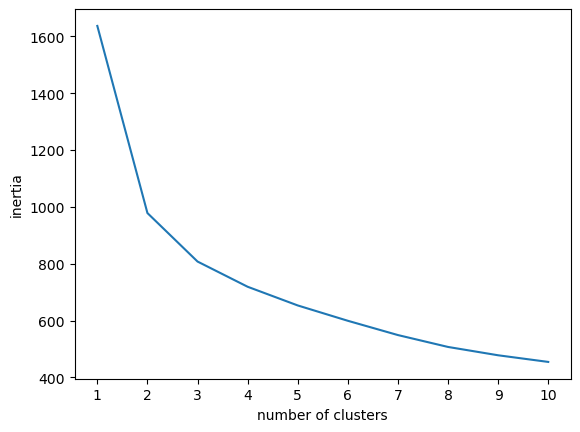

In [41]:
# Plot ks (x-axis) vs inertias (y-axis) using plt.plot(). 
plt.plot(ks, inertias)

# define the label for the x axis as 'number of clusters' using matplotlib.pyplot.xlabel
plt.xlabel('number of clusters')
# define the label for the y axis as 'inertia' using matplotlib.pyplot.ylabel
plt.ylabel('inertia')
# define the ticks on the x axis using the values of ks
plt.xticks(ks)
# call plt.show()
plt.show()

In [42]:
df_k4 = df_mnt_scaled.copy()
k4 = KMeans(n_clusters=4, random_state = 100).fit(df_mnt)

In [43]:
# DO IT
df_k4['k4_c'] = k4.labels_

In [44]:
#DO IT
df_k4.groupby(['k4_c']).mean().transpose()

k4_c,0,1,2,3
MntMeat&Fish,0.313468,0.438716,0.371986,0.065161
MntEntries,0.175042,0.169882,0.479641,0.032858
MntVegan&Vegetarian,0.136571,0.229314,0.268114,0.021295
MntDrinks,0.198207,0.177870,0.472517,0.032718
MntDesserts,0.174506,0.166371,0.494937,0.033189
MntAdditionalRequests,0.582318,0.145409,0.299976,0.073043


In [45]:
#DO IT
d4 = df_k4.groupby(['k4_c']).describe().transpose()
d4

k4_c                                  0            1           2            3
MntMeat&Fish          count  733.000000  1376.000000  935.000000  3956.000000
                      mean     0.313468     0.438716    0.371986     0.065161
                      std      0.205403     0.223948    0.194120     0.090014
                      min      0.005340     0.000200    0.013351     0.000000
                      25%      0.158211     0.272864    0.227637     0.007343
                      50%      0.269693     0.439252    0.345794     0.022697
                      75%      0.431909     0.591622    0.494660     0.094126
                      max      0.997330     1.000000    0.988652     0.546729
MntEntries            count  733.000000  1376.000000  935.000000  3956.000000
                      mean     0.175042     0.169882    0.479641     0.032858
                      std      0.156380     0.145251    0.257529     0.050843
                      min      0.000000     0.000000    0.000000     0.000000
                      25%      0.060302     0.060302    0.266332     0.005025
                      50%      0.132663     0.136432    0.467337     0.015075
                      75%      0.247739     0.246231    0.673367     0.040201
                      max      0.964824     0.804020    1.000000     0.582915
MntVegan&Vegetarian   count  733.000000  1376.000000  935.000000  3956.000000
                      mean     0.136571     0.229314    0.268114     0.021295
                      std      0.109442     0.198914    0.140217     0.024679
                      min      0.006930     0.011550    0.033495     0.000000
                      25%      0.060060     0.101640    0.153038     0.005198
                      50%      0.098175     0.169785    0.258143     0.011550
                      75%      0.178448     0.294237    0.369600     0.028298
                      max      0.556711     1.000000    0.576923     0.225225
MntDrinks             count  733.000000  1376.000000  935.000000  3956.000000
                      mean     0.198207     0.177870    0.472517     0.032718
                      std      0.189162     0.158928    0.260065     0.049884
                      min      0.000000     0.000000    0.000000     0.000000
                      25%      0.055276     0.060302    0.251256     0.005025
                      50%      0.140704     0.140704    0.462312     0.015075
                      75%      0.286432     0.256281    0.668342     0.040201
                      max      0.944724     0.959799    1.000000     0.577889
MntDesserts           count  733.000000  1376.000000  935.000000  3956.000000
                      mean     0.174506     0.166371    0.494937     0.033189
                      std      0.165355     0.144185    0.254971     0.051284
                      min      0.000000     0.000000    0.000000     0.000000
                      25%      0.050251     0.060302    0.281407     0.005025
                      50%      0.120603     0.130653    0.502513     0.015075
                      75%      0.241206     0.246231    0.703518     0.040201
                      max      0.944724     0.804020    1.000000     0.567839
MntAdditionalRequests count  733.000000  1376.000000  935.000000  3956.000000
                      mean     0.582318     0.145409    0.299976     0.073043
                      std      0.181759     0.095562    0.206414     0.076795
                      min      0.244980     0.000000    0.000000     0.000000
                      25%      0.429719     0.068273    0.140562     0.020080
                      50%      0.554217     0.132530    0.244980     0.044177
                      75%      0.706827     0.212851    0.425703     0.100402
                      max      1.000000     0.465863    1.000000     0.437751

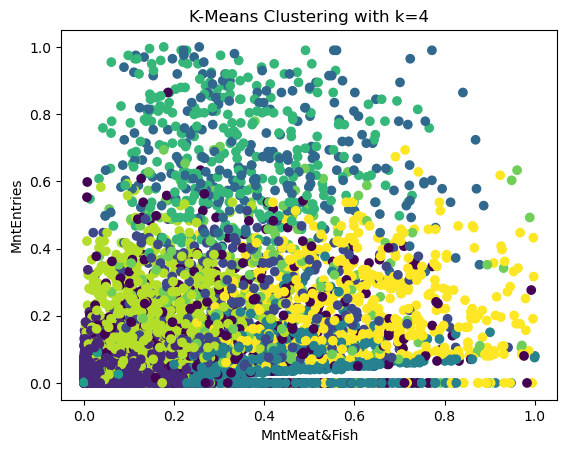

In [46]:
import matplotlib.pyplot as plt

# Select two variables to plot
x_var = 'MntMeat&Fish'
y_var = 'MntEntries'

# Create scatter plot with color-coded clusters
plt.scatter(df_k4[x_var], df_k4[y_var], c=kmeans.labels_)
plt.xlabel(x_var)
plt.ylabel(y_var)
plt.title('K-Means Clustering with k=4')
plt.show()

In [47]:
#minmax doesn't work

In [48]:
#We need to choose which columns to use

In [49]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

# Define a range of parameter values to try
eps_values = [0.1, 0.5, 1, 2, 5, 10, 0.001]
min_samples_values = [2, 5, 10, 20, 30]

# Find the optimal parameter values using the silhouette score
best_score = -1
for eps in eps_values:
    for min_samples in min_samples_values:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        dbscan.fit(df_mnt)
        labels = dbscan.labels_
        if len(set(labels)) > 1:
            score = silhouette_score(df_mnt, labels)
            if score > best_score:
                best_score = score
                best_eps = eps
                best_min_samples = min_samples

# Fit the DBSCAN model with the optimal parameters
dbscan = DBSCAN(eps=best_eps, min_samples=best_min_samples)
dbscan.fit(df_mnt)
labels = dbscan.labels_

# Print the number of clusters and noise points
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
n_noise = list(labels).count(-1)
print('Number of clusters: {}'.format(n_clusters))
print('Number of noise points: {}'.format(n_noise))


Number of clusters: 2
Number of noise points: 5


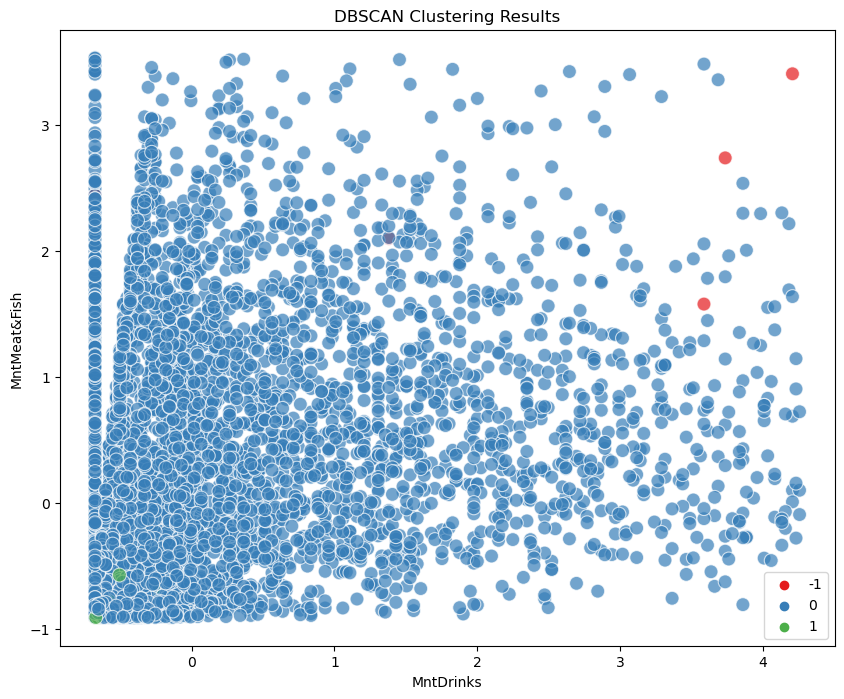

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns

# Fit DBSCAN model with optimal parameters
dbscan = DBSCAN(eps=best_eps, min_samples=best_min_samples)
dbscan.fit(df_mnt)
labels = dbscan.labels_

# Plot clustering results
plt.figure(figsize=(10, 8))
sns.scatterplot(x='MntDrinks', y='MntMeat&Fish', hue=labels, data=df_mnt, palette='Set1', s=100, alpha=0.7)
plt.title('DBSCAN Clustering Results')
plt.xlabel('MntDrinks')
plt.ylabel('MntMeat&Fish')
plt.show()

In [51]:
#let's transform

df_mnt

,MntMeat&Fish,MntEntries,MntVegan&Vegetarian,MntDrinks,MntDesserts,MntAdditionalRequests
0,1.231545,1.631463,0.166294,1.306613,-0.125481,0.290929
1,0.822066,-0.272597,-0.010247,-0.057739,-0.275076,-0.696035
2,1.572778,-0.678797,-0.313437,-0.677900,-0.673996,-0.293192
3,0.596556,-0.323372,-0.110031,-0.504255,0.024115,0.713914
4,-0.815849,-0.678797,-0.651168,-0.677900,-0.673996,-0.716177
...,...,...,...,...,...,...
6995,-0.827718,-0.653409,-0.666519,-0.677900,-0.624131,-0.776603
6996,-0.845522,-0.577247,-0.578249,-0.653093,-0.574266,-0.393903
6997,-0.008760,2.443861,0.269916,1.554677,0.547698,1.298035
6998,-0.907834,-0.424922,-0.689547,-0.479448,-0.673996,-0.575182


In [52]:
df_mnt2=df_mnt.copy()

In [53]:
df_mnt2['extras'] = df_mnt2['MntEntries'] + df_mnt2['MntDesserts']


In [54]:
df_mnt2 = df_mnt2.drop(['MntEntries', 'MntDesserts'], axis=1)


In [55]:
df_mnt2

,MntMeat&Fish,MntVegan&Vegetarian,MntDrinks,MntAdditionalRequests,extras
0,1.231545,0.166294,1.306613,0.290929,1.505982
1,0.822066,-0.010247,-0.057739,-0.696035,-0.547673
2,1.572778,-0.313437,-0.677900,-0.293192,-1.352793
3,0.596556,-0.110031,-0.504255,0.713914,-0.299257
4,-0.815849,-0.651168,-0.677900,-0.716177,-1.352793
...,...,...,...,...,...
6995,-0.827718,-0.666519,-0.677900,-0.776603,-1.277540
6996,-0.845522,-0.578249,-0.653093,-0.393903,-1.151513
6997,-0.008760,0.269916,1.554677,1.298035,2.991559
6998,-0.907834,-0.689547,-0.479448,-0.575182,-1.098918


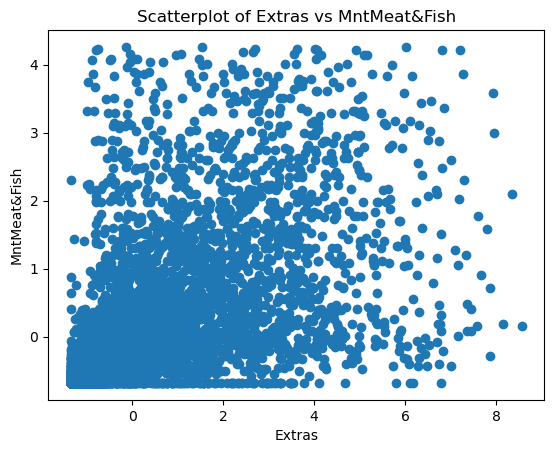

In [56]:
import matplotlib.pyplot as plt

# Extract the columns of interest
extras = df_mnt2['extras']
meat_fish = df_mnt2['MntDrinks']

# Create the scatterplot
plt.scatter(extras, meat_fish)

# Set the axis labels and title
plt.xlabel('Extras')
plt.ylabel('MntMeat&Fish')
plt.title('Scatterplot of Extras vs MntMeat&Fish')

# Show the plot
plt.show()

In [57]:
df_mnt2['mains'] = df_mnt2['MntMeat&Fish'] + df_mnt2['MntVegan&Vegetarian']

In [58]:
df_mnt2 = df_mnt2.drop(['MntMeat&Fish', 'MntVegan&Vegetarian'], axis=1)

In [59]:
df_mnt2

,MntDrinks,MntAdditionalRequests,extras,mains
0,1.306613,0.290929,1.505982,1.397839
1,-0.057739,-0.696035,-0.547673,0.811819
2,-0.677900,-0.293192,-1.352793,1.259341
3,-0.504255,0.713914,-0.299257,0.486525
4,-0.677900,-0.716177,-1.352793,-1.467017
...,...,...,...,...
6995,-0.677900,-0.776603,-1.277540,-1.494238
6996,-0.653093,-0.393903,-1.151513,-1.423771
6997,1.554677,1.298035,2.991559,0.261155
6998,-0.479448,-0.575182,-1.098918,-1.597380


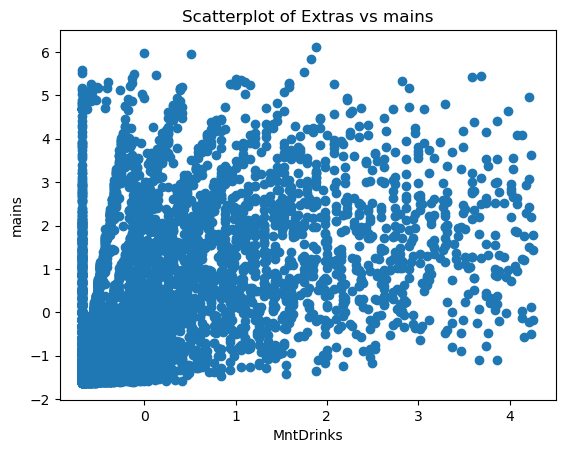

In [60]:
# Extract the columns of interest
extras = df_mnt2['MntDrinks']
meat_fish = df_mnt2['mains']

# Create the scatterplot
plt.scatter(extras, meat_fish)

# Set the axis labels and title
plt.xlabel('MntDrinks')
plt.ylabel('mains')
plt.title('Scatterplot of Extras vs mains')

# Show the plot
plt.show()

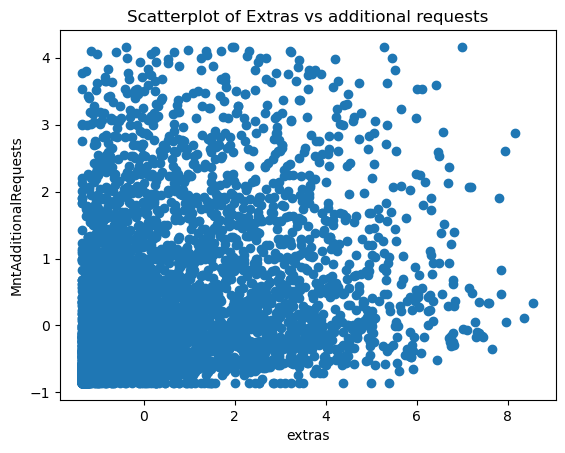

In [61]:
# Extract the columns of interest
extras = df_mnt2['extras']
meat_fish = df_mnt2['MntAdditionalRequests']

# Create the scatterplot
plt.scatter(extras, meat_fish)

# Set the axis labels and title
plt.xlabel('extras')
plt.ylabel('MntAdditionalRequests')
plt.title('Scatterplot of Extras vs additional requests')

# Show the plot
plt.show()

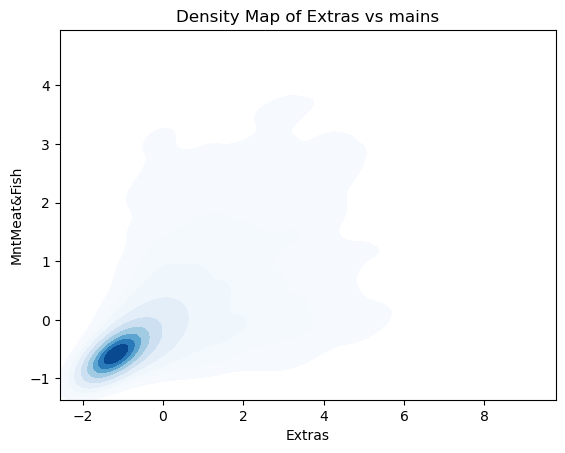

In [62]:
import seaborn as sns

# Extract the columns of interest
extras = df_mnt2['extras']
meat_fish = df_mnt2['MntDrinks']

# Create the density map
sns.kdeplot(x=extras, y=meat_fish, cmap='Blues', shade=True)

# Set the axis labels and title
plt.xlabel('Extras')
plt.ylabel('MntMeat&Fish')
plt.title('Density Map of Extras vs mains')

# Show the plot
plt.show()


In [63]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

# Extract the columns of interest
X = df_mnt2

# Standardize the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Instantiate and fit the DBSCAN model
dbscan = DBSCAN(eps=0.74, min_samples=31, metric='euclidean')
dbscan.fit(X)

# Add the cluster labels to the dataframe
df_mnt2['cluster'] = dbscan.labels_

# Print the number of clusters and cluster labels
n_clusters = len(set(dbscan.labels_)) - (1 if -1 in dbscan.labels_ else 0)
print('Number of clusters:', n_clusters)
print('Cluster labels:', dbscan.labels_)


Number of clusters: 1
Cluster labels: [ 0  0  0 ... -1  0  0]


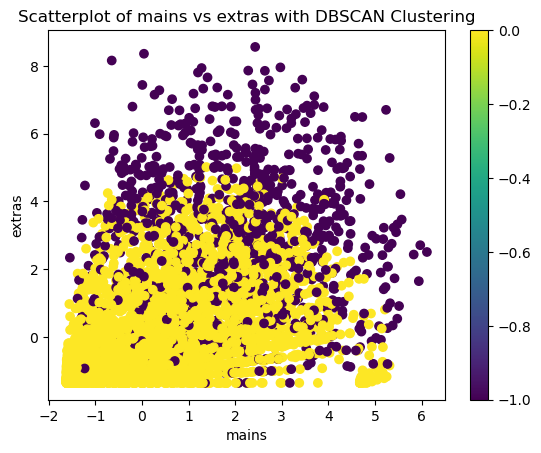

In [64]:
import matplotlib.pyplot as plt

# Set the x and y variables
x_var = 'mains'
y_var = 'extras'

# Create the scatterplot
plt.scatter(df_mnt2[x_var], df_mnt2[y_var], c=df_mnt2['cluster'], cmap='viridis')
plt.colorbar()

# Set the axis labels and title
plt.xlabel(x_var)
plt.ylabel(y_var)
plt.title('Scatterplot of {} vs {} with DBSCAN Clustering'.format(x_var, y_var))

# Show the plot
plt.show()


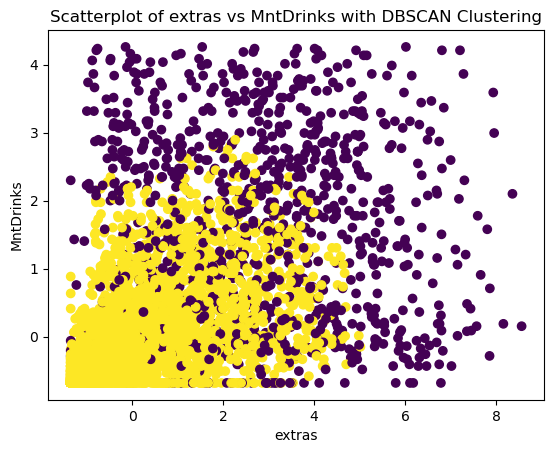

In [65]:
import matplotlib.pyplot as plt

# Set the columns of interest and the cluster label column
x_var = 'extras'
y_var = 'MntDrinks'
cluster_var = 'cluster'

# Create the scatterplot with cluster labels as colors
plt.scatter(df_mnt2[x_var], df_mnt2[y_var], c=df_mnt2[cluster_var], cmap='viridis')

# Set the axis labels and title
plt.xlabel(x_var)
plt.ylabel(y_var)
plt.title('Scatterplot of {} vs {} with DBSCAN Clustering'.format(x_var, y_var))

# Show the plot
plt.show()


In [66]:
# Count the number of points in each cluster
cluster_counts = df_mnt2['cluster'].value_counts()

# Print the number of points in cluster -1
n_noise = cluster_counts[-1]
print('Number of noise points:', n_noise)

Number of noise points: 950


In [67]:
# Count the number of points in each cluster
cluster_counts = df_mnt2['cluster'].value_counts()

# Print the number of points in each cluster
for cluster_id, n_points in cluster_counts.iteritems():
    print(f"Cluster {cluster_id}: {n_points} points")


Cluster 0: 6050 points
Cluster -1: 950 points


In [68]:
# Compute summary statistics for each cluster
cluster_stats = df_mnt2.groupby('cluster').agg(['mean', 'median', 'std', 'count'])

cluster_stats

MntDrinks                           MntAdditionalRequests            \
             mean    median       std count                  mean    median   
cluster                                                                       
-1       1.664734  1.641499  1.373926   950              1.394484  1.318177   
 0      -0.261404 -0.529061  0.597899  6050             -0.218969 -0.474472   

                           extras                               mains  \
              std count      mean    median       std count      mean   
cluster                                                                 
-1       1.329535   950  2.795795  2.788298  2.145835   950  1.927197   
 0       0.725632  6050 -0.439009 -1.000553  1.217379  6050 -0.302618   

                                   
           median       std count  
cluster                            
-1       1.913861  1.633141   950  
 0      -0.970530  1.523514  6050

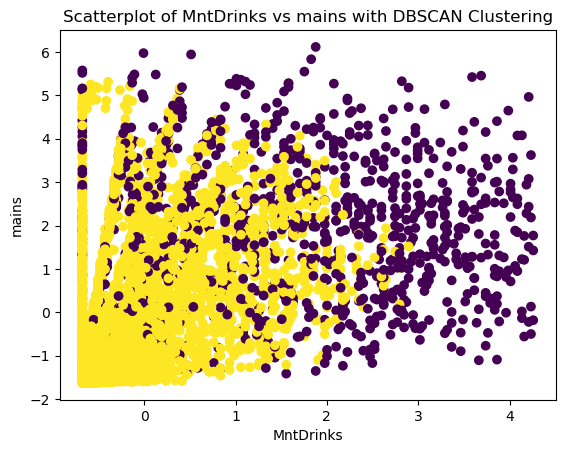

In [69]:
import matplotlib.pyplot as plt

# Set the columns of interest and the cluster label column
x_var = 'MntDrinks'
y_var = 'mains'
cluster_var = 'cluster'

# Create the scatterplot with cluster labels as colors
plt.scatter(df_mnt2[x_var], df_mnt2[y_var], c=df_mnt2[cluster_var], cmap='viridis')

# Set the axis labels and title
plt.xlabel(x_var)
plt.ylabel(y_var)
plt.title('Scatterplot of {} vs {} with DBSCAN Clustering'.format(x_var, y_var))

# Show the plot
plt.show()

In [70]:
#DO IT
df_mnt2.groupby(['cluster']).describe().transpose()

cluster                              -1            0
MntDrinks             count  950.000000  6050.000000
                      mean     1.664734    -0.261404
                      std      1.373926     0.597899
                      min     -0.677900    -0.677900
                      25%      0.438389    -0.653093
                      50%      1.641499    -0.529061
                      75%      2.788796    -0.114794
                      max      4.258575     2.894223
MntAdditionalRequests count  950.000000  6050.000000
                      mean     1.394484    -0.218969
                      std      1.329535     0.725632
                      min     -0.857172    -0.857172
                      25%      0.230503    -0.716177
                      50%      1.318177    -0.474472
                      75%      2.420959     0.008939
                      max      4.158217     3.775516
extras                count  950.000000  6050.000000
                      mean     2.795795    -0.439009
                      std      2.145835     1.217379
                      min     -1.352793    -1.352793
                      25%      1.066801    -1.252153
                      50%      2.788298    -1.000553
                      75%      4.298401    -0.083420
                      max      8.560248     5.016466
mains                 count  950.000000  6050.000000
                      mean     1.927197    -0.302618
                      std      1.633141     1.523514
                      min     -1.547648    -1.626342
                      25%      0.671687    -1.506293
                      50%      1.913861    -0.970530
                      75%      3.070338     0.521022
                      max      6.114564     5.312425

In [170]:
#BACK TO OG DATA SET

from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

# Extract the columns of interest
X = df_mnt

# Standardize the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Instantiate and fit the DBSCAN model
dbscan = DBSCAN(eps=0.75, min_samples=25, metric='euclidean')
dbscan.fit(X)

# Add the cluster labels to the dataframe
df_mnt['cluster_'] = dbscan.labels_

# Print the number of clusters and cluster labels
n_clusters = len(set(dbscan.labels_)) - (1 if -1 in dbscan.labels_ else 0)
print('Number of clusters:', n_clusters)
print('Cluster labels:', dbscan.labels_)

Number of clusters: 3
Cluster labels: [-1  0  0 ... -1  0  0]


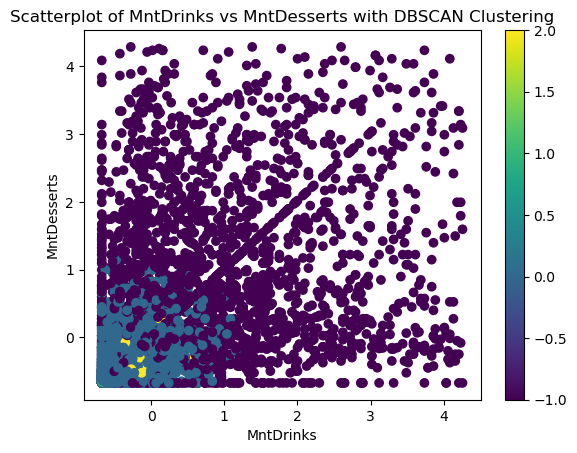

In [171]:

import matplotlib.pyplot as plt

# Set the x and y variables
x_var = 'MntDrinks'
y_var = 'MntDesserts'

# Create the scatterplot
plt.scatter(df_mnt[x_var], df_mnt[y_var], c=df_mnt['cluster_'], cmap='viridis')
plt.colorbar()

# Set the axis labels and title
plt.xlabel(x_var)
plt.ylabel(y_var)
plt.title('Scatterplot of {} vs {} with DBSCAN Clustering'.format(x_var, y_var))

# Show the plot
plt.show()

In [175]:
# Compute descriptive stats for each cluster
ogcluster = df_mnt.groupby('cluster_').agg(['mean', 'median', 'std', 'count'])

ogcluster

MntMeat&Fish                           MntEntries            \
                 mean    median       std count       mean    median   
cluster_                                                               
-1           0.797520  0.642549  1.001101  2316   0.959425  0.692126   
 0          -0.386025 -0.762439  0.734452  4565  -0.472680 -0.577247   
 1          -0.886576 -0.903383  0.035806    39  -0.668902 -0.671180   
 2          -0.628427 -0.624908  0.173177    80  -0.476935 -0.501084   

                         MntVegan&Vegetarian            ... MntDrinks        \
               std count                mean    median  ...       std count   
cluster_                                                ...                   
-1        1.219350  2316            0.884610  0.718944  ...  1.215480  2316   
 0        0.283890  4565           -0.486979 -0.612790  ...  0.283279  4565   
 1        0.014024    39            5.595178  5.592629  ...  0.012270    39   
 2        0.185824    80           -0.548889 -0.603195  ...  0.282875    80   

         MntDesserts                           MntAdditionalRequests  \
                mean    median       std count                  mean   
cluster_                                                               
-1          0.956242  0.672361  1.227319  2316              0.728545   
 0         -0.471758 -0.574266  0.273477  4565             -0.351260   
 1         -0.662617 -0.666517  0.014297    39             -0.828611   
 2         -0.440503 -0.561800  0.256164    80             -0.643691   

                                    
            median       std count  
cluster_                            
-1        0.331213  1.233987  2316  
 0       -0.575182  0.596069  4565  
 1       -0.835016  0.025893    39  
 2       -0.655751  0.102639    80  

[4 rows x 24 columns]

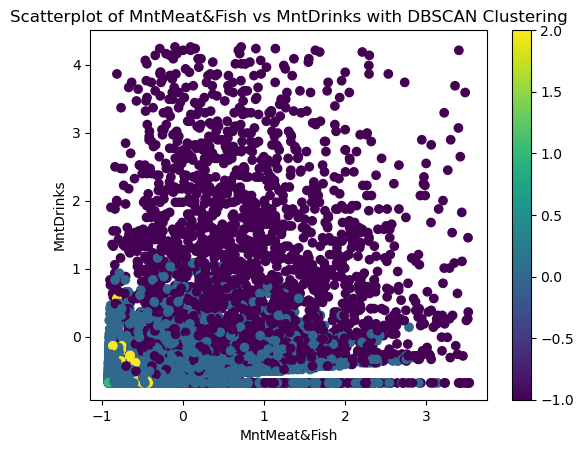

In [176]:
import matplotlib.pyplot as plt

# Set the x and y variables
x_var = 'MntMeat&Fish'
y_var = 'MntDrinks'

# Create the scatterplot
plt.scatter(df_mnt[x_var], df_mnt[y_var], c=df_mnt['cluster_'], cmap='viridis')
plt.colorbar()

# Set the axis labels and title
plt.xlabel(x_var)
plt.ylabel(y_var)
plt.title('Scatterplot of {} vs {} with DBSCAN Clustering'.format(x_var, y_var))

# Show the plot
plt.show()

In [177]:
# Compute descriptive stats for each cluster
ogcluster = df_mnt.groupby('cluster_').agg(['mean', 'median', 'std', 'count'])

ogcluster

MntMeat&Fish                           MntEntries            \
                 mean    median       std count       mean    median   
cluster_                                                               
-1           0.797520  0.642549  1.001101  2316   0.959425  0.692126   
 0          -0.386025 -0.762439  0.734452  4565  -0.472680 -0.577247   
 1          -0.886576 -0.903383  0.035806    39  -0.668902 -0.671180   
 2          -0.628427 -0.624908  0.173177    80  -0.476935 -0.501084   

                         MntVegan&Vegetarian            ... MntDrinks        \
               std count                mean    median  ...       std count   
cluster_                                                ...                   
-1        1.219350  2316            0.884610  0.718944  ...  1.215480  2316   
 0        0.283890  4565           -0.486979 -0.612790  ...  0.283279  4565   
 1        0.014024    39            5.595178  5.592629  ...  0.012270    39   
 2        0.185824    80           -0.548889 -0.603195  ...  0.282875    80   

         MntDesserts                           MntAdditionalRequests  \
                mean    median       std count                  mean   
cluster_                                                               
-1          0.956242  0.672361  1.227319  2316              0.728545   
 0         -0.471758 -0.574266  0.273477  4565             -0.351260   
 1         -0.662617 -0.666517  0.014297    39             -0.828611   
 2         -0.440503 -0.561800  0.256164    80             -0.643691   

                                    
            median       std count  
cluster_                            
-1        0.331213  1.233987  2316  
 0       -0.575182  0.596069  4565  
 1       -0.835016  0.025893    39  
 2       -0.655751  0.102639    80  

[4 rows x 24 columns]

In [ ]:
#CONCLUSION: MINMAX NORMALIZATION GIVES MORE SPECIFIC GROUPS